# Clasificador de corredores de F1
Este trabajo tiene por objetivo que dado un gran dataset poder clasificar a los corredores de la formula 1, la idea es ocupar todo el conocimiento obtenido dentro del curso para lograr llegar a este objetivo.
Para esto, la plataforma tiene algunas preguntas a responder, las cuales son:
- ¿Qué tipo de preguntas sobre ciencia de datos puedes responder en función de tus datos?
puedo generar algunos algoritmos de clasificación y compararlos entre ellos, junto con que tipo de algoritmo entrega un mejor recall al ser optimizado
- ¿Es esta una tarea supervisada o no supervisada?
Como tal, no tiene una columna target, pero yo voy a hacer la columna target definiendo los corredores
- Si se trata de una tarea supervisada, ¿es una tarea de regresión o clasificación?
De clasificación
- ¿Qué tan limpios están tus datos?
yo espero q lo más limpio posibles
- ¿Qué problemas crees que pueden surgir?
quizas en temas de tiempo se demore bastante, debido a la dimension del dataset

# exploración de datos

## importando las librerias a usar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV

## cargando la data

Las ubicaciones

In [3]:
archivo1='/Users/matiasinostrozacifuentes/Desktop/python_intro/F1_ML_classifier/Data/results.csv'
archivo2='/Users/matiasinostrozacifuentes/Desktop/python_intro/F1_ML_classifier/Data/status.csv'
archivo3='/Users/matiasinostrozacifuentes/Desktop/python_intro/F1_ML_classifier/Data/drivers.csv'
archivo4='/Users/matiasinostrozacifuentes/Desktop/python_intro/F1_ML_classifier/Data/constructors.csv'
archivo5='/Users/matiasinostrozacifuentes/Desktop/python_intro/F1_ML_classifier/Data/driver_standings.csv'
archivo6='/Users/matiasinostrozacifuentes/Desktop/python_intro/F1_ML_classifier/Data/races.csv'

Cargandolas

In [4]:
resultados=pd.read_csv(archivo1)
Estado=pd.read_csv(archivo2)
drivers=pd.read_csv(archivo3)
cosntructors=pd.read_csv(archivo4)
standing=pd.read_csv(archivo5)
races=pd.read_csv(archivo6)

In [5]:
pd.get_option("display.max_columns",None)

20

primer vistazo

In [6]:
resultados.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [7]:
Estado.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [8]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [9]:
cosntructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [10]:
standing.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [11]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,29/03/09,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,05/04/09,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,19/04/09,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,26/04/09,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,10/05/09,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


A primera impresion hay algunas columnas que hay que eliminar como el url dado a que solo dificultarian en el proceso de trabajo

Revisando si hay NaN

In [12]:
resultados
Estado
drivers
cosntructors
standing
races

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,29/03/09,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,05/04/09,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,19/04/09,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,26/04/09,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,10/05/09,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,09/10/22,5:00:00,http://en.wikipedia.org/wiki/2022_Japanese_Gra...
1075,1093,2022,19,69,United States Grand Prix,23/10/22,19:00:00,http://en.wikipedia.org/wiki/2022_United_State...
1076,1094,2022,20,32,Mexico City Grand Prix,30/10/22,20:00:00,http://en.wikipedia.org/wiki/2022_Mexican_Gran...
1077,1095,2022,21,18,Brazilian Grand Prix,13/11/22,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...


In [13]:
resultados.isna().sum()


resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [14]:
Estado.isna().sum()


statusId    0
status      0
dtype: int64

In [15]:
drivers.isna().sum()


driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

In [16]:
cosntructors.isna().sum()


constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64

In [17]:
standing.isna().sum()


driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

In [18]:
races.isna().sum()

raceId       0
year         0
round        0
circuitId    0
name         0
date         0
time         0
url          0
dtype: int64

no hay NAN, se eliminaran duplicados

In [19]:
resultados.drop_duplicates(inplace=True)


In [20]:
Estado.drop_duplicates(inplace=True)


In [21]:
drivers.drop_duplicates(inplace=True)


In [22]:
cosntructors.drop_duplicates(inplace=True)


In [23]:
standing.drop_duplicates(inplace=True)


In [24]:
races.drop_duplicates(inplace=True)

In [27]:
bases=[resultados,
Estado,
drivers,
cosntructors,
standing,
races]

In [30]:
for i in range(6):
    print(bases[i].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25460 entries, 0 to 25459
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25460 non-null  int64  
 1   raceId           25460 non-null  int64  
 2   driverId         25460 non-null  int64  
 3   constructorId    25460 non-null  int64  
 4   number           25460 non-null  object 
 5   grid             25460 non-null  int64  
 6   position         25460 non-null  object 
 7   positionText     25460 non-null  object 
 8   positionOrder    25460 non-null  int64  
 9   points           25460 non-null  float64
 10  laps             25460 non-null  int64  
 11  time             25460 non-null  object 
 12  milliseconds     25460 non-null  object 
 13  fastestLap       25460 non-null  object 
 14  rank             25460 non-null  object 
 15  fastestLapTime   25460 non-null  object 
 16  fastestLapSpeed  25460 non-null  object 
 17  statusId    

En todas las bases que contengan la columna URL se eliminará

In [32]:
races.drop(columns=['url'],inplace=True)
drivers.drop(columns=['url'],inplace=True)
cosntructors.drop(columns=['url'],inplace=True)

Ahora generando un dataframe que contenga a todos los sub dataframes

In [40]:
con1 = pd.merge(resultados, races, on ='raceId')
con2 = pd.merge(con1, drivers, on = 'driverId')
con3 = pd.merge(con2, standing, on = 'driverId')
con4 = pd.merge(con3, cosntructors, on ='constructorId')
df = pd.merge(con4, Estado, on ='statusId')
pd.get_option("display.max_columns",None)
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,...,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name_y,nationality_y,status
0,1,18,1,1,22,1,1,1,1,10.0,...,1,18,10.0,1,1,1,mclaren,McLaren,British,Finished
1,1,18,1,1,22,1,1,1,1,10.0,...,9,19,14.0,1,1,1,mclaren,McLaren,British,Finished
2,1,18,1,1,22,1,1,1,1,10.0,...,27,20,14.0,3,3,1,mclaren,McLaren,British,Finished
3,1,18,1,1,22,1,1,1,1,10.0,...,48,21,20.0,2,2,1,mclaren,McLaren,British,Finished
4,1,18,1,1,22,1,1,1,1,10.0,...,69,22,28.0,3,3,1,mclaren,McLaren,British,Finished


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364731 entries, 0 to 3364730
Data columns (total 41 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time_x             object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  year               int64  
 19  round              int64  
 20  circuitId          int64  
 21  name_x             object 
 22  date               object 
 23  time_y             object 
 24  driverRef          object 
 25  number_y          

Checkeando que no hayan quedado NaN

In [42]:
df.isna().sum()

resultId             0
raceId_x             0
driverId             0
constructorId        0
number_x             0
grid                 0
position_x           0
positionText_x       0
positionOrder        0
points_x             0
laps                 0
time_x               0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
year                 0
round                0
circuitId            0
name_x               0
date                 0
time_y               0
driverRef            0
number_y             0
code                 0
forename             0
surname              0
dob                  0
nationality_x        0
driverStandingsId    0
raceId_y             0
points_y             0
position_y           0
positionText_y       0
wins                 0
constructorRef       0
name_y               0
nationality_y        0
status               0
dtype: int64

No hay NaN en la union de los dataframes, ahora se eliminaran duplicados

In [43]:
df.duplicated().sum()

0

No habian duplicados, por lo que no se debe realizar nada por el estilo

ahora se deben eliminar columnas que son innecesarias para el objetivo que se busca

In [46]:
df.drop(columns=['position_x','fastestLapTime','positionText_x','time_x','time_y','driverRef',
              'constructorRef','nationality_y','positionText_y','raceId_y','points_y'],inplace=True)

In [48]:
df.columns

Index(['resultId', 'raceId_x', 'driverId', 'constructorId', 'number_x', 'grid',
       'positionOrder', 'points_x', 'laps', 'milliseconds', 'fastestLap',
       'rank', 'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId',
       'name_x', 'date', 'number_y', 'code', 'forename', 'surname', 'dob',
       'nationality_x', 'driverStandingsId', 'position_y', 'wins', 'name_y',
       'status'],
      dtype='object')

In [49]:
df.shape

(3364731, 30)

ahora hay que transformar las siguientes columnas aun formato para poder usar 
- date
- dob (día de nacimiento)

además se va a crear una columna de la edad del corredor y se asignará a una nueva columna

junto con que se va a juntar las columnas de forename y surname en una sola

In [50]:
df['date']=pd.to_datetime(df['date'])
df['dob']=pd.to_datetime(df['dob'])

In [51]:
from datetime import datetime

In [55]:
Tiempo=datetime.today()-df['dob']
Años=Tiempo.dt.days/365
Años=round(Años)

In [56]:
df['Edad']=Años

In [57]:
df['Nombre']=df['forename']+' '+df['surname']

In [58]:
df.drop(columns=['forename','surname'],inplace=True)

In [59]:
df.shape

(3364731, 30)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364731 entries, 0 to 3364730
Data columns (total 30 columns):
 #   Column             Dtype         
---  ------             -----         
 0   resultId           int64         
 1   raceId_x           int64         
 2   driverId           int64         
 3   constructorId      int64         
 4   number_x           object        
 5   grid               int64         
 6   positionOrder      int64         
 7   points_x           float64       
 8   laps               int64         
 9   milliseconds       object        
 10  fastestLap         object        
 11  rank               object        
 12  fastestLapSpeed    object        
 13  statusId           int64         
 14  year               int64         
 15  round              int64         
 16  circuitId          int64         
 17  name_x             object        
 18  date               datetime64[ns]
 19  number_y           object        
 20  code               objec

In [61]:
col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}

df.rename(columns=col_name,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364731 entries, 0 to 3364730
Data columns (total 30 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   resultId               int64         
 1   racerId                int64         
 2   driverId               int64         
 3   constructorId          int64         
 4   number                 object        
 5   grid                   int64         
 6   positionOrder          int64         
 7   points                 float64       
 8   laps                   int64         
 9   timetaken_in_millisec  object        
 10  fastestLap             object        
 11  rank                   object        
 12  max_speed              object        
 13  statusId               int64         
 14  year                   int64         
 15  round                  int64         
 16  circuitId              int64         
 17  grand_prix             object        
 18  date                  

Ahora revisando las primeras impresiones de las variables numericas

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,3364731.0,12047.747856,7927.371034,1.0,4825.0,11121.0,20444.0,25465.0
racerId,3364731.0,492.282376,317.172071,1.0,223.0,447.0,782.0,1076.0
driverId,3364731.0,184.762399,243.400286,1.0,20.0,102.0,212.0,855.0
constructorId,3364731.0,37.539315,54.483112,1.0,6.0,17.0,35.0,214.0
grid,3364731.0,9.810997,6.597413,0.0,4.0,9.0,15.0,34.0
positionOrder,3364731.0,11.331430,7.431728,1.0,5.0,10.0,17.0,39.0
points,3364731.0,2.819503,5.122316,0.0,0.0,0.0,4.0,50.0
laps,3364731.0,48.028090,25.426385,0.0,31.0,54.0,67.0,200.0
statusId,3364731.0,13.462866,22.476459,1.0,1.0,5.0,12.0,139.0
year,3364731.0,1995.242811,16.915292,1950.0,1983.0,1997.0,2010.0,2022.0


Lo que más llama la atención son los corredores que tienen más de 54 años, debido a que los corredores se tienden a retirar antes de los 45 años, por ende los corredores de mayor edad se consideraran fuera del algoritmo

In [66]:
df=df.loc[df['Edad']<45,:]
df

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,...,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,Edad,Nombre
0,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,1,1,1,McLaren,Finished,37.0,Lewis Hamilton
1,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,9,1,1,McLaren,Finished,37.0,Lewis Hamilton
2,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,27,3,1,McLaren,Finished,37.0,Lewis Hamilton
3,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,48,2,1,McLaren,Finished,37.0,Lewis Hamilton
4,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,69,3,1,McLaren,Finished,37.0,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363264,25405,1073,853,210,9,20,20,0.0,0,\N,...,MAZ,1999-03-02,Russian,70654,21,0,Haas F1 Team,Illness,23.0,Nikita Mazepin
3363265,25405,1073,853,210,9,20,20,0.0,0,\N,...,MAZ,1999-03-02,Russian,70675,21,0,Haas F1 Team,Illness,23.0,Nikita Mazepin
3363266,25405,1073,853,210,9,20,20,0.0,0,\N,...,MAZ,1999-03-02,Russian,70696,21,0,Haas F1 Team,Illness,23.0,Nikita Mazepin
3363267,25405,1073,853,210,9,20,20,0.0,0,\N,...,MAZ,1999-03-02,Russian,70738,21,0,Haas F1 Team,Illness,23.0,Nikita Mazepin


In [76]:
l = ['number','timetaken_in_millisec','fastestLap','rank','max_speed','driver_num']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')

Esto redujo bastante la data, ahora se pueden hacer algunos gráficos introductorios para revisar la data

In [100]:
def graf_automaticos(df):
    tiposdatos2=pd.DataFrame(df.dtypes) #Codigo mostrado en clases por un compañero
    tiposdatos2.reset_index(inplace=True)
    tiposdatos2

    for i in range(df.shape[1]):
            if df.dtypes[i] != 'object':
                    plt.figure(dpi=150)
                    sns.histplot(df[tiposdatos2['index'][i]],kde=True)
                    plt.xticks(rotation=45)
                    plt.title(tiposdatos2['index'][i])
                    plt.show()
            else:
                    obj=df[tiposdatos2['index'][i]].value_counts()
                    plt.figure(dpi=150)
                    sns.barplot(y=obj.index,x=obj.values,palette='husl')
                    plt.title(tiposdatos2['index'][i])

                    plt.show()
    return df

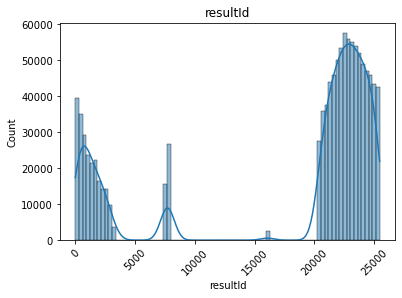

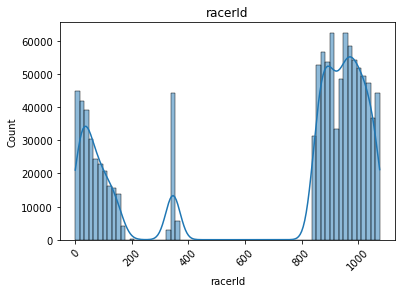

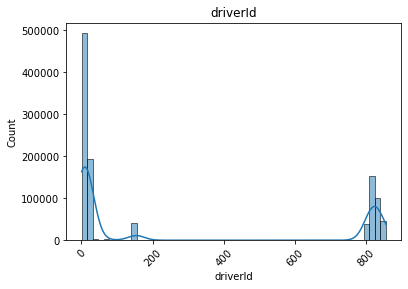

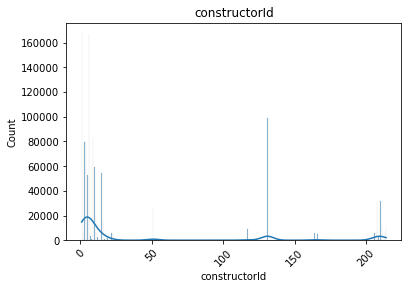

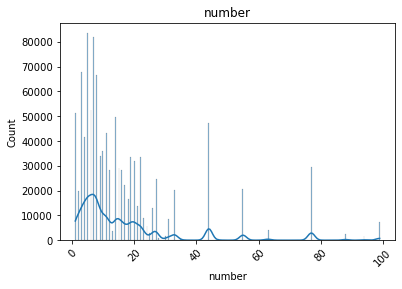

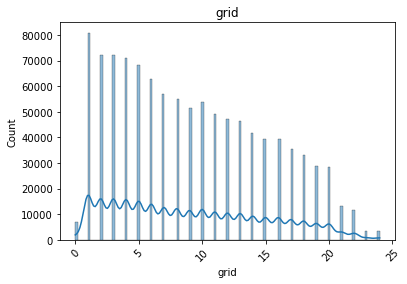

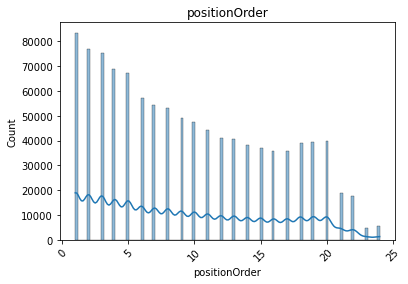

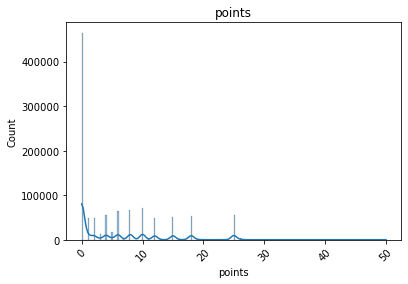

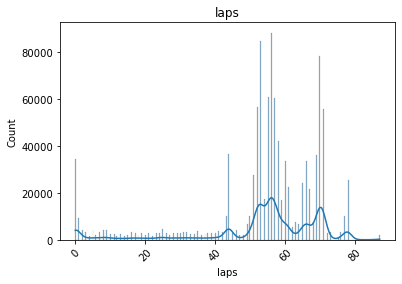

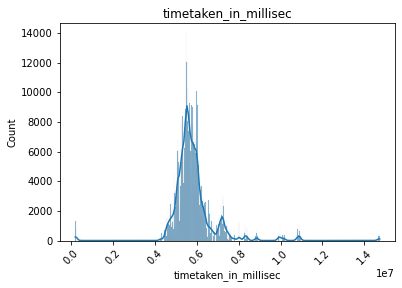

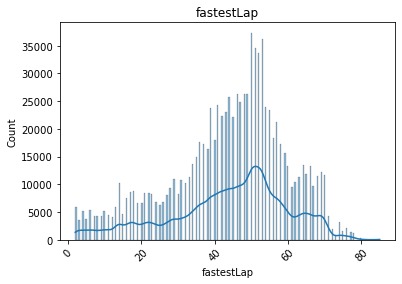

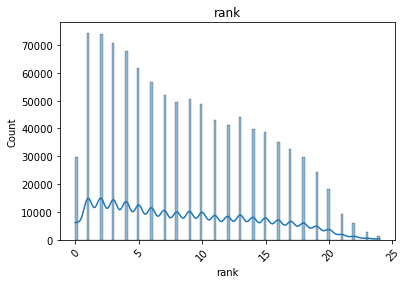

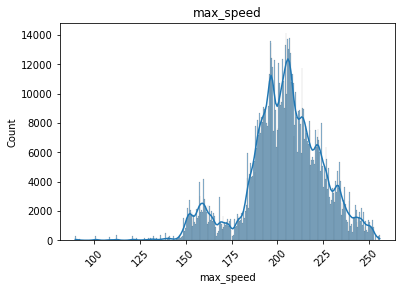

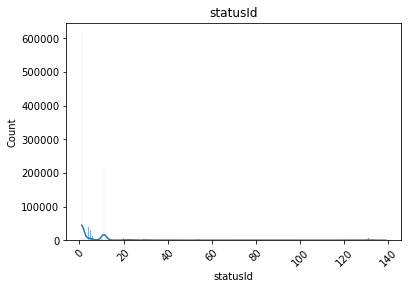

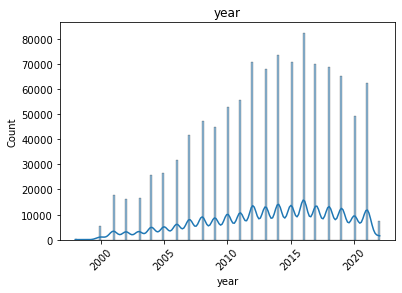

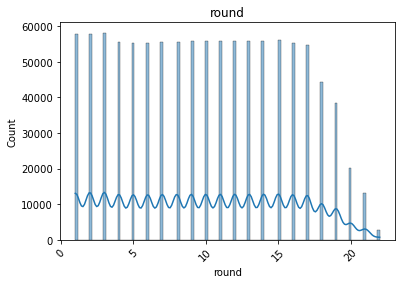

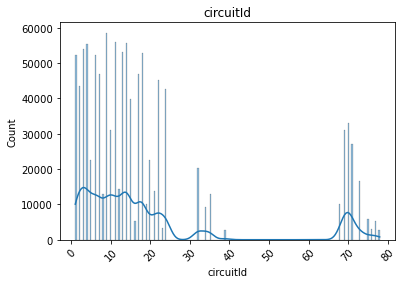

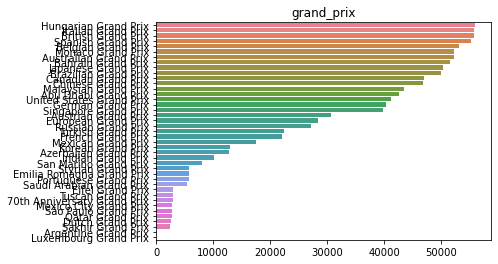

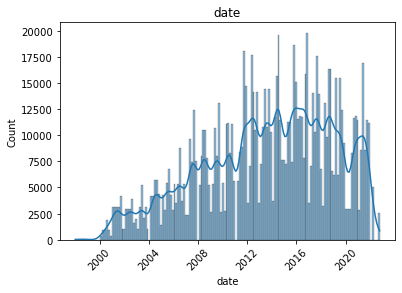

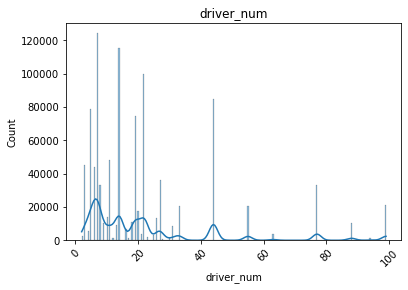

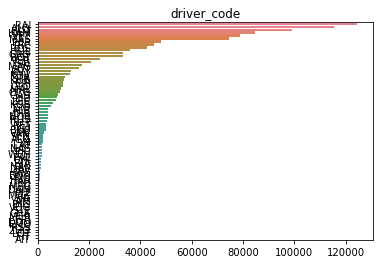

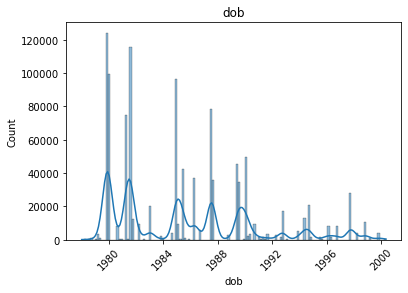

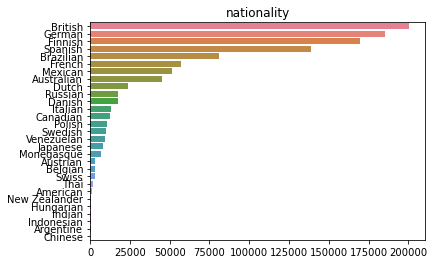

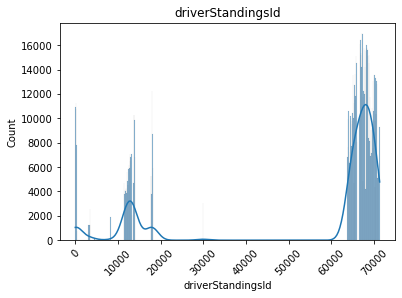

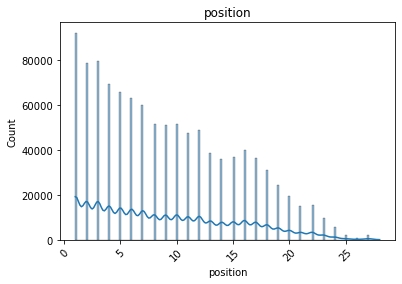

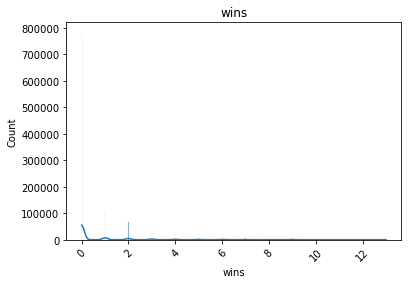

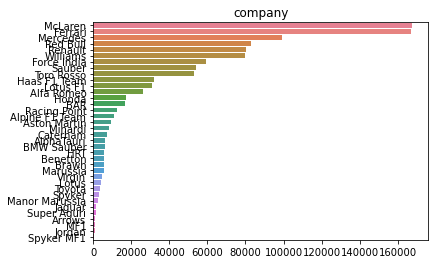

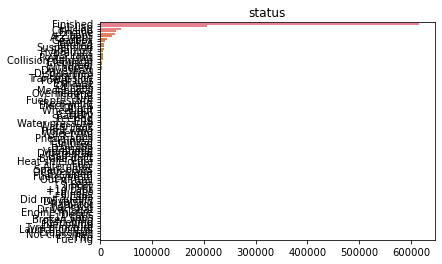

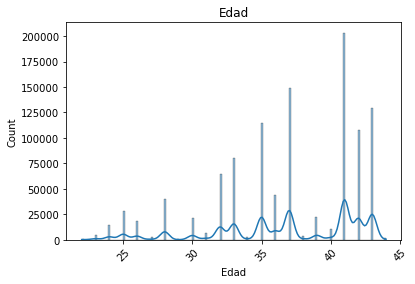

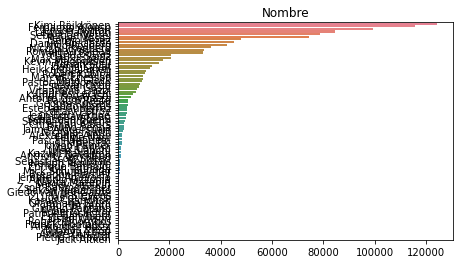

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,...,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,Edad,Nombre
0,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,1,1,1,McLaren,Finished,37.0,Lewis Hamilton
1,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,9,1,1,McLaren,Finished,37.0,Lewis Hamilton
2,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,27,3,1,McLaren,Finished,37.0,Lewis Hamilton
3,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,48,2,1,McLaren,Finished,37.0,Lewis Hamilton
4,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,69,3,1,McLaren,Finished,37.0,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363264,25405,1073,853,210,9,20,20,0.0,0,NaN,...,MAZ,1999-03-02,Russian,70654,21,0,Haas F1 Team,Illness,23.0,Nikita Mazepin
3363265,25405,1073,853,210,9,20,20,0.0,0,NaN,...,MAZ,1999-03-02,Russian,70675,21,0,Haas F1 Team,Illness,23.0,Nikita Mazepin
3363266,25405,1073,853,210,9,20,20,0.0,0,NaN,...,MAZ,1999-03-02,Russian,70696,21,0,Haas F1 Team,Illness,23.0,Nikita Mazepin
3363267,25405,1073,853,210,9,20,20,0.0,0,NaN,...,MAZ,1999-03-02,Russian,70738,21,0,Haas F1 Team,Illness,23.0,Nikita Mazepin


In [78]:
graf_automaticos(df)

Filtrando por estado de la carrera finalizado que hace referencia a que fue finalizada correctamente la carrera

In [82]:
df=df.loc[df['status']=='Finished',:]
df.shape

(615092, 30)

Se redujo bastante la data para poder trabajar
más 400 mil registros
ahora hay que revisar los registros nuevamente

In [83]:
df.isnull().sum()

resultId                     0
racerId                      0
driverId                     0
constructorId                0
number                       0
grid                         0
positionOrder                0
points                       0
laps                         0
timetaken_in_millisec        0
fastestLap               20543
rank                     17568
max_speed                20543
statusId                     0
year                         0
round                        0
circuitId                    0
grand_prix                   0
date                         0
driver_num               16211
driver_code                  0
dob                          0
nationality                  0
driverStandingsId            0
position                     0
wins                         0
company                      0
status                       0
Edad                         0
Nombre                       0
dtype: int64

Se eliminará la columna de driver num debido a que existen muchos valores inexistentes y es dificil de completar esta data
además que para los valores faltantes se aplicaran los siguientes criterios:
- fastestLap : se llenará con 0 debido a que se considerará que no consiguio en la carrera una vuelta
- max_speed: con el promedio debido al rendimiento en los ultimos años de los monoplazas
- rank: el valor del rango más veloz es con 0 debido a que se considerará que no corrio la carrera o que simplemente no tuvo cambios en el desempeño de la carrera

In [85]:
df.drop('driver_num',1,inplace=True)

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_28622/3838380957.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('driver_num',1,inplace=True)


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615092 entries, 0 to 1250117
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   resultId               615092 non-null  int64         
 1   racerId                615092 non-null  int64         
 2   driverId               615092 non-null  int64         
 3   constructorId          615092 non-null  int64         
 4   number                 615092 non-null  int64         
 5   grid                   615092 non-null  int64         
 6   positionOrder          615092 non-null  int64         
 7   points                 615092 non-null  float64       
 8   laps                   615092 non-null  int64         
 9   timetaken_in_millisec  615092 non-null  float64       
 10  fastestLap             594549 non-null  float64       
 11  rank                   597524 non-null  float64       
 12  max_speed              594549 non-null  flo

In [87]:
df[['rank','fastestLap']] = df[['rank','fastestLap']].fillna(0)
df['max_speed']= df['max_speed'].fillna(df['max_speed'].mean())
df['number'] = df['number'].fillna(0)

In [91]:
df.isnull().sum()

resultId                 0
racerId                  0
driverId                 0
constructorId            0
number                   0
grid                     0
positionOrder            0
points                   0
laps                     0
timetaken_in_millisec    0
fastestLap               0
rank                     0
max_speed                0
statusId                 0
year                     0
round                    0
circuitId                0
grand_prix               0
date                     0
driver_code              0
dob                      0
nationality              0
driverStandingsId        0
position                 0
wins                     0
company                  0
status                   0
Edad                     0
Nombre                   0
dtype: int64

In [92]:
tiposdatos2=pd.DataFrame(df.dtypes) 
tiposdatos2.reset_index(inplace=True)
tiposdatos2

,index,0
0,resultId,int64
1,racerId,int64
2,driverId,int64
3,constructorId,int64
4,number,int64
5,grid,int64
6,positionOrder,int64
7,points,float64
8,laps,int64
9,timetaken_in_millisec,float64


In [93]:
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [99]:
len(cat)

6

In [98]:
len(num)

23

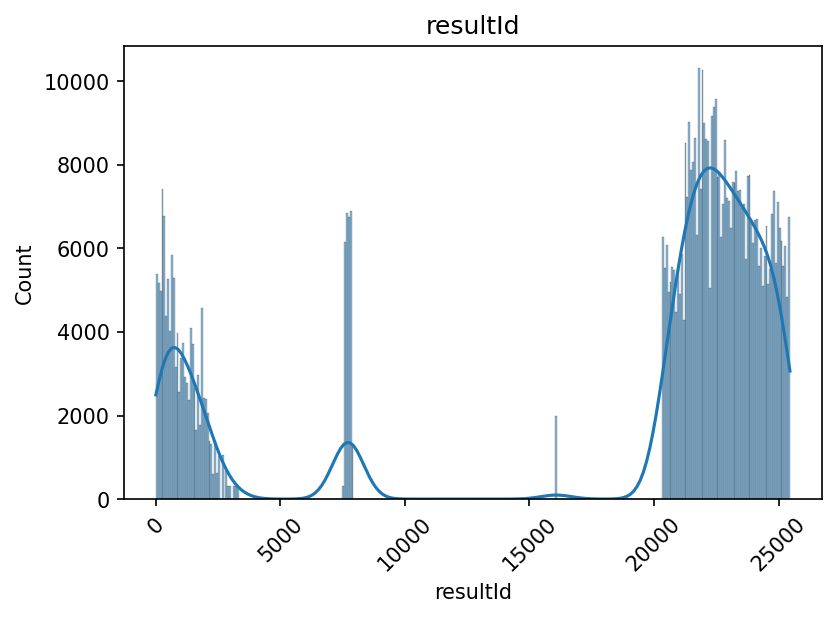

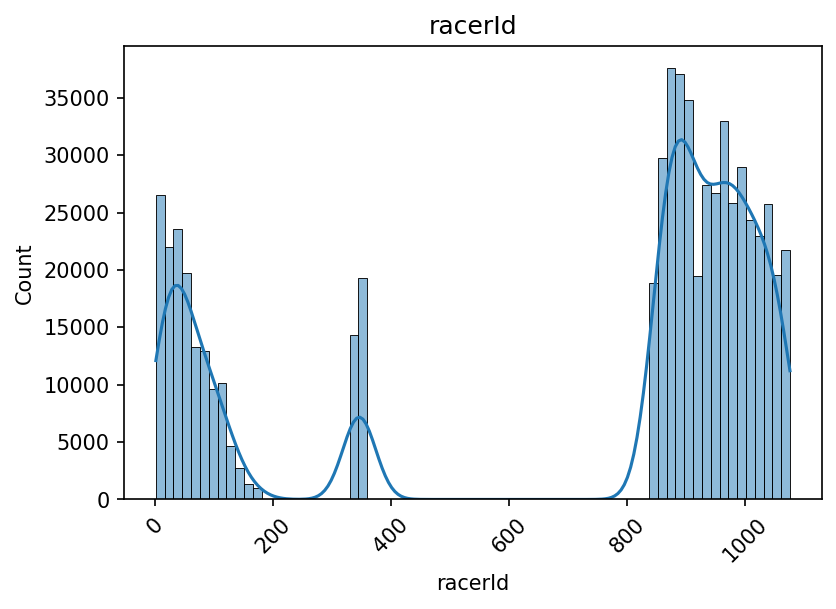

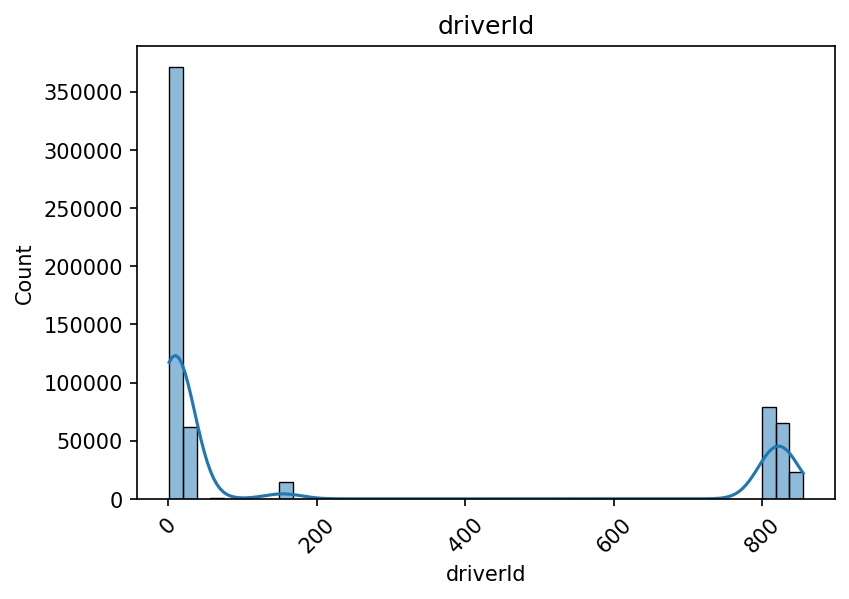

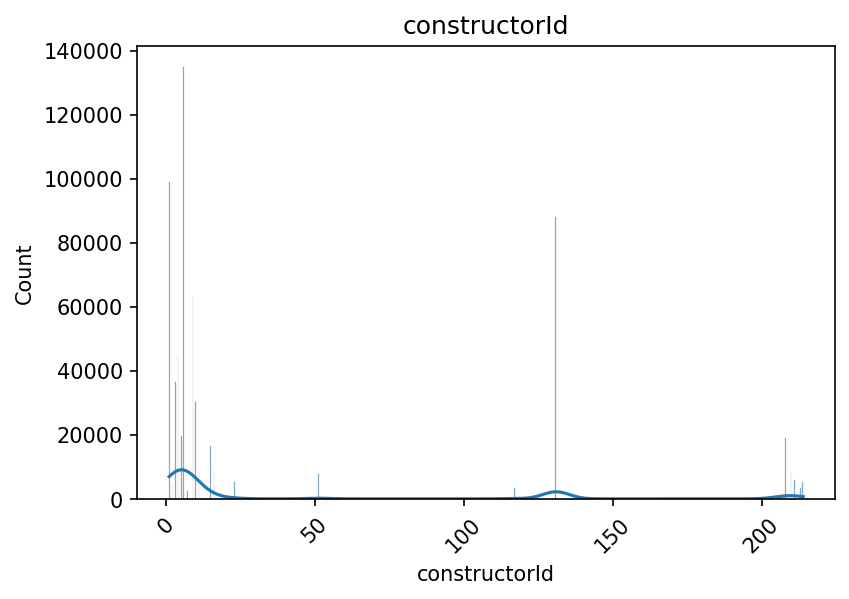

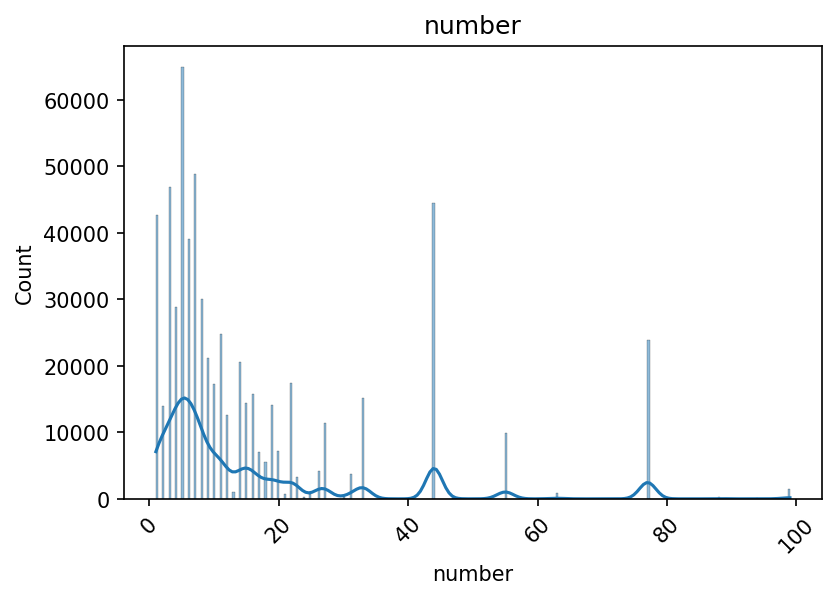

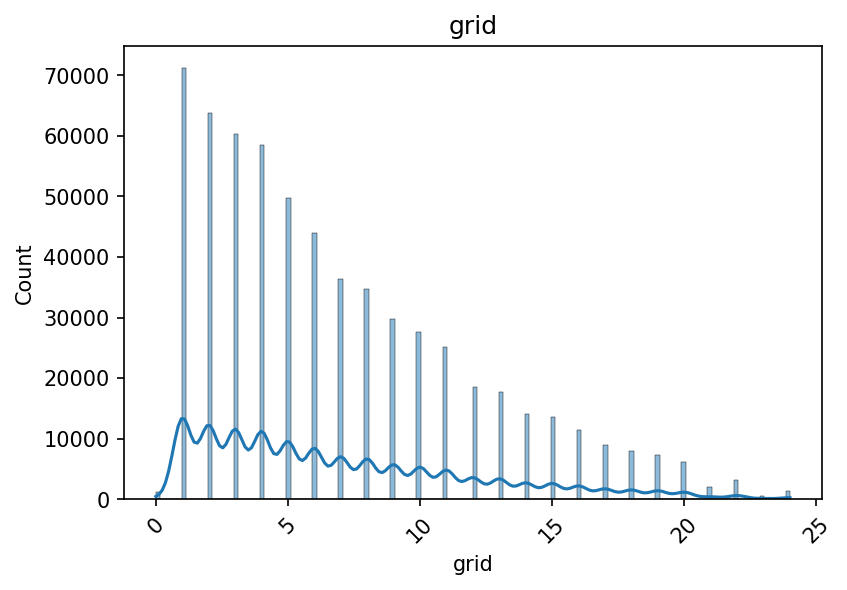

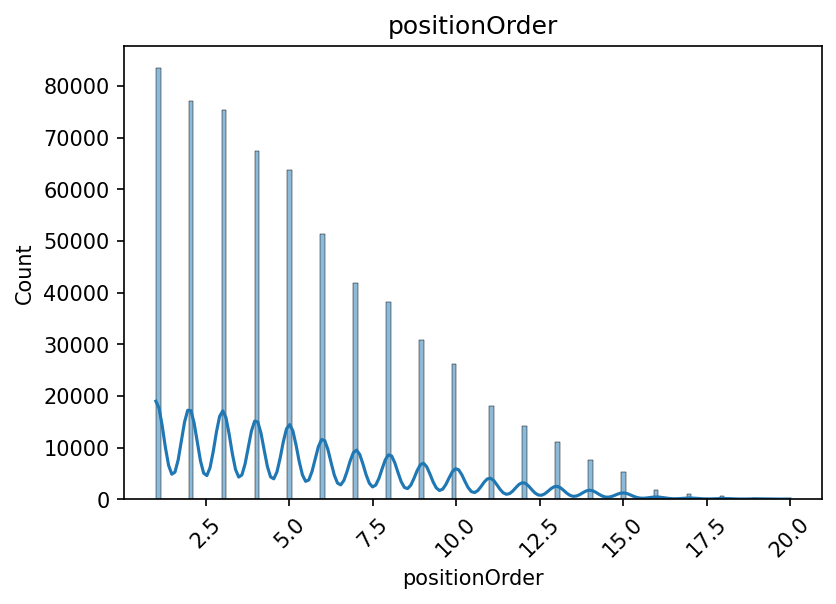

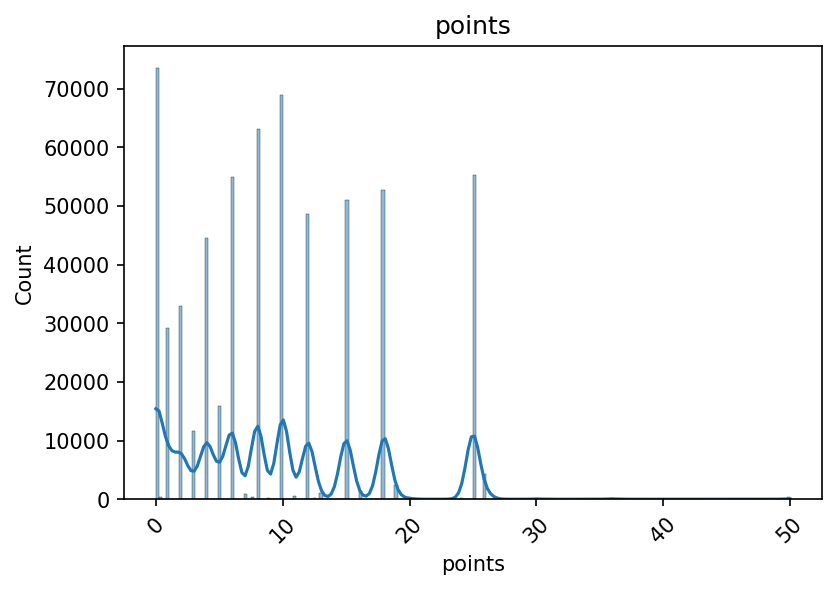

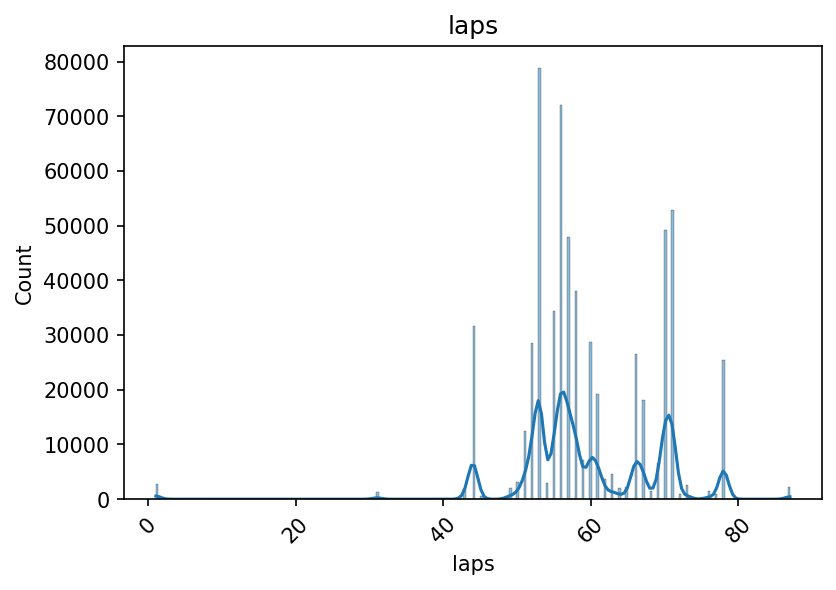

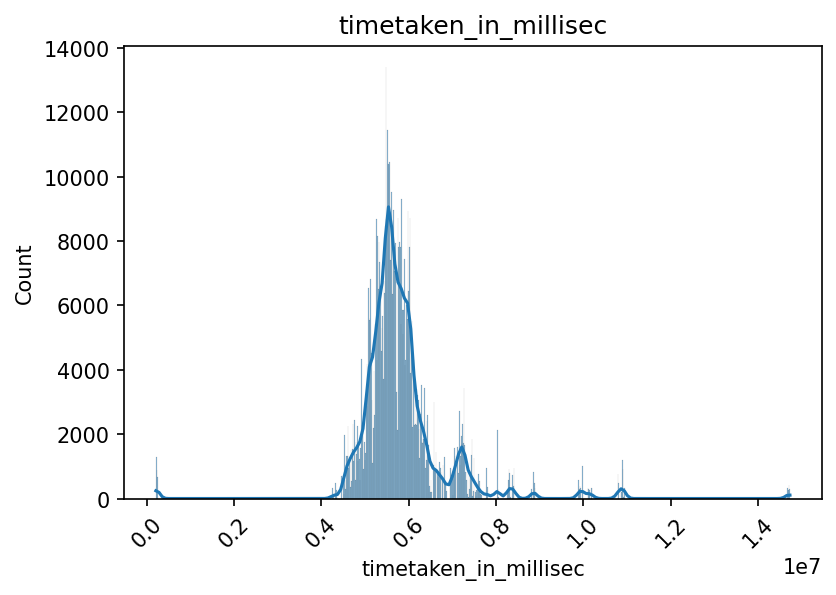

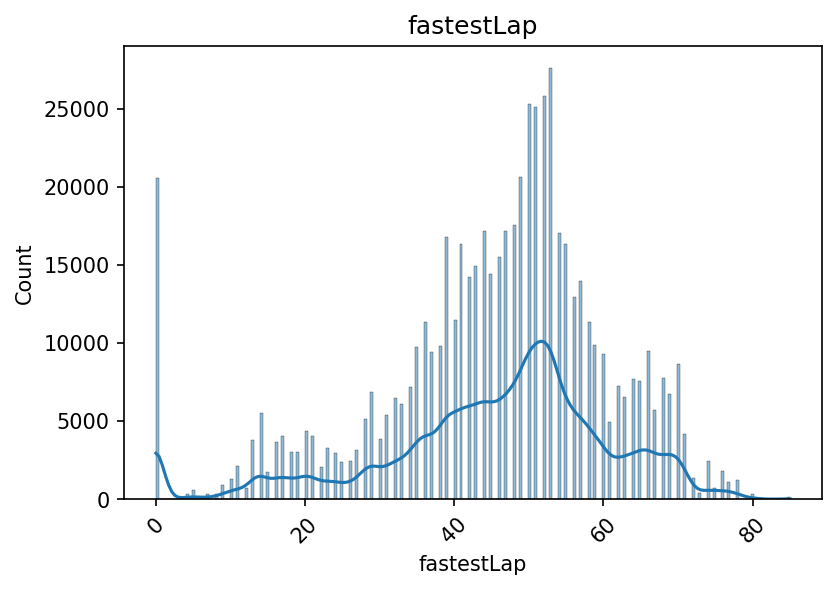

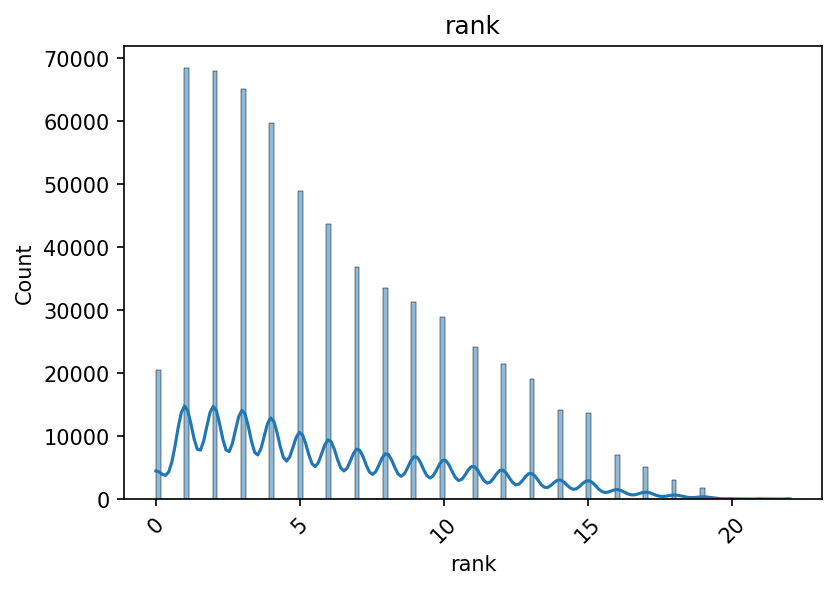

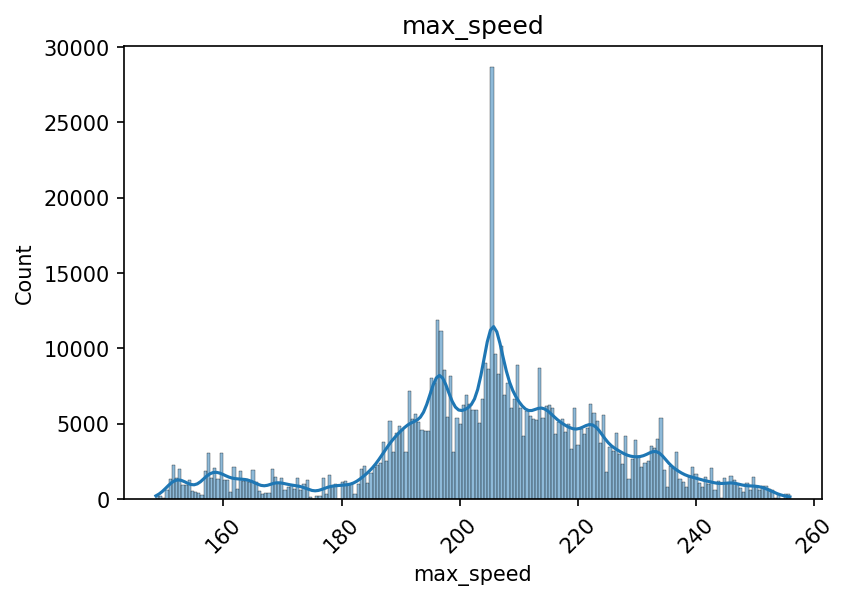

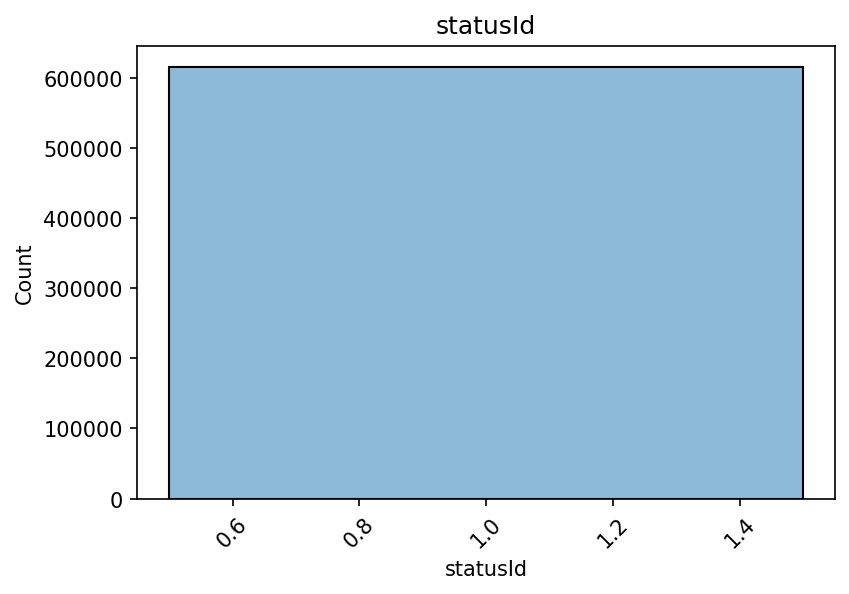

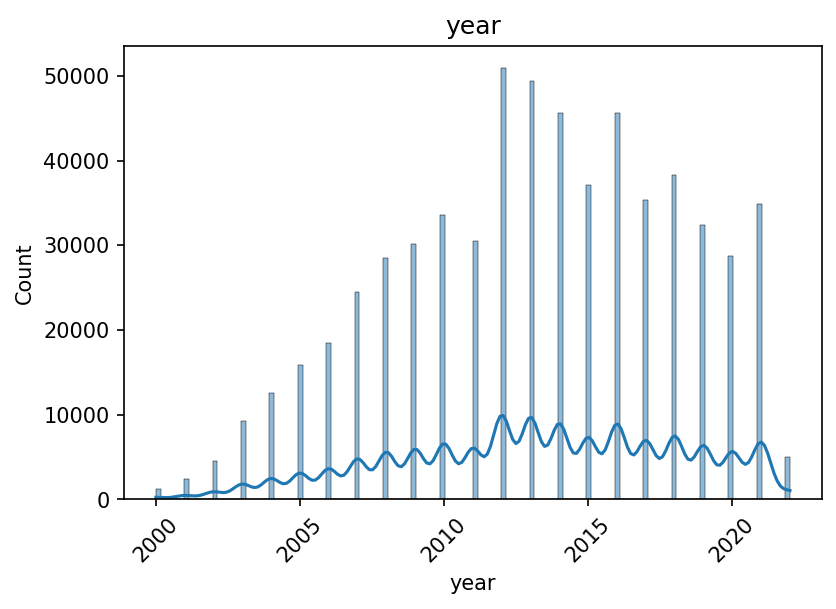

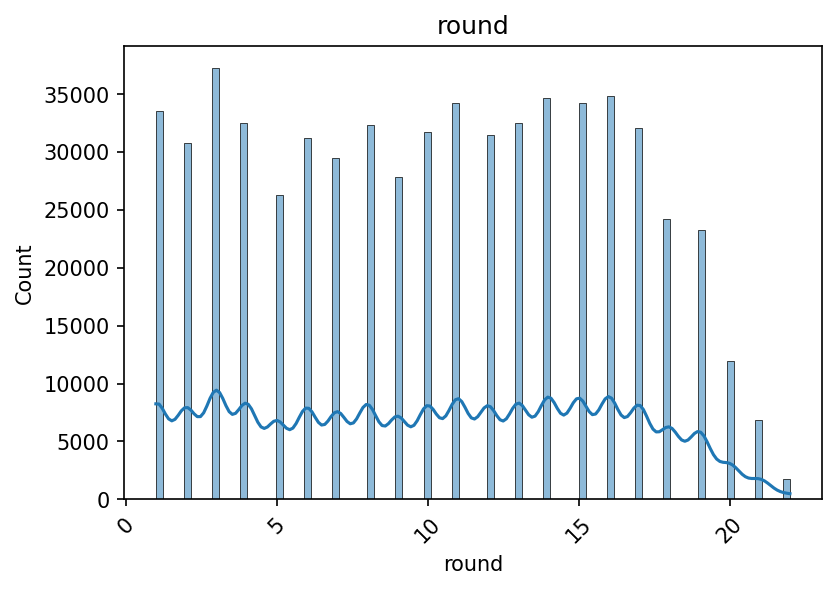

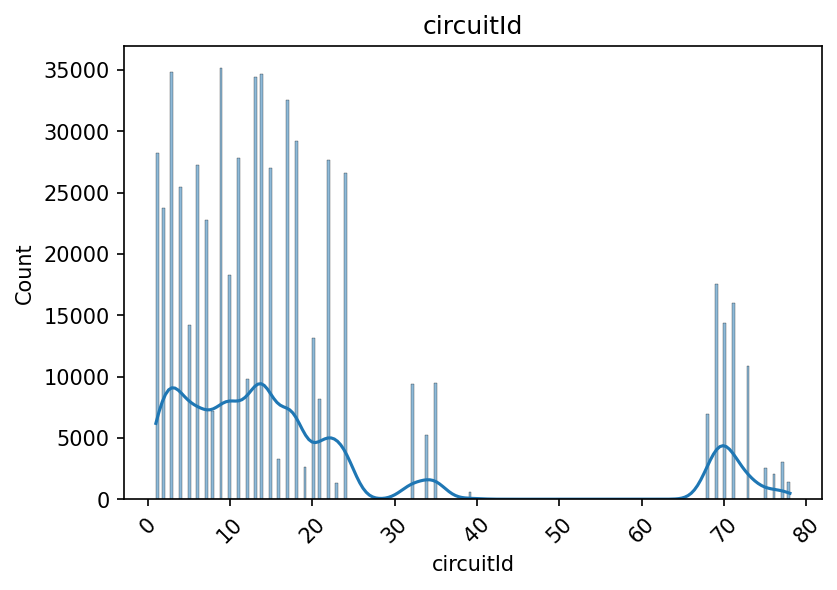

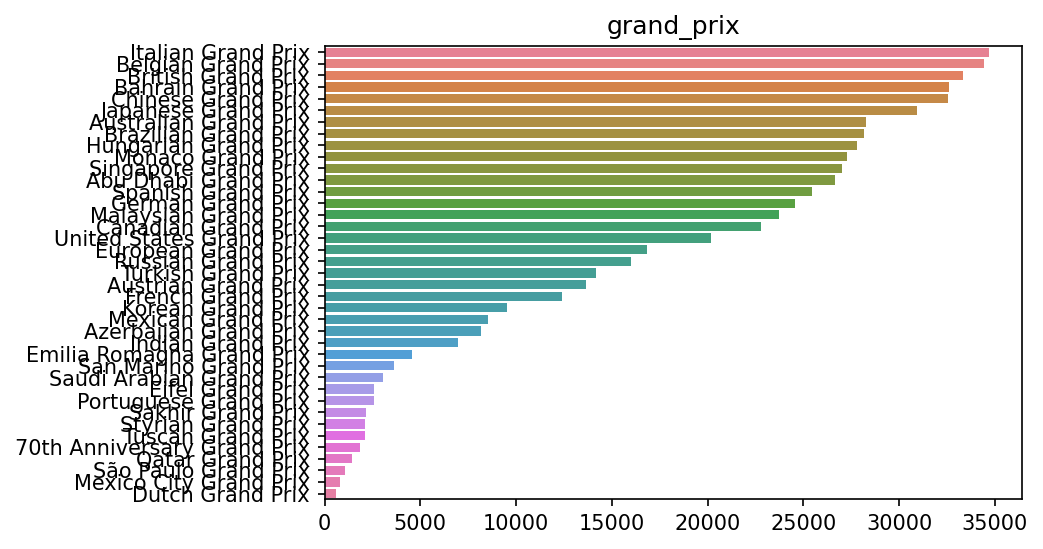

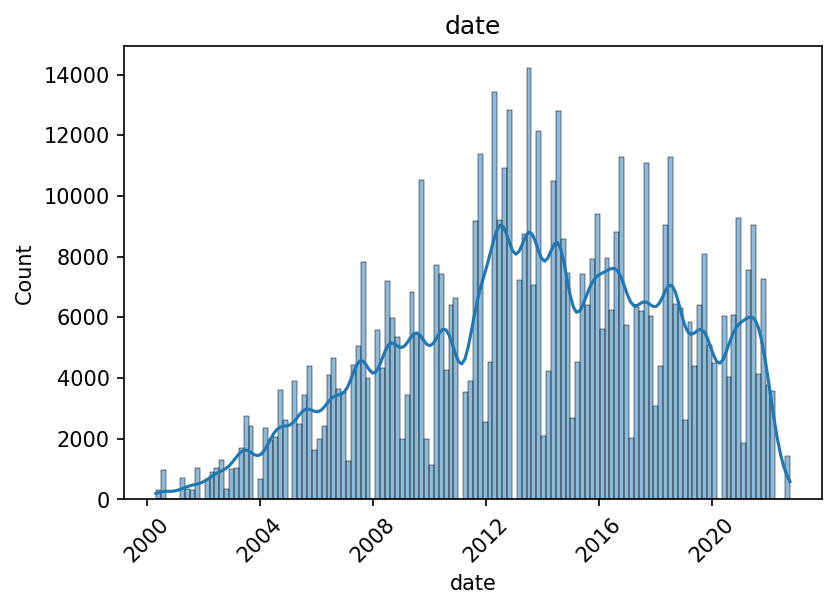

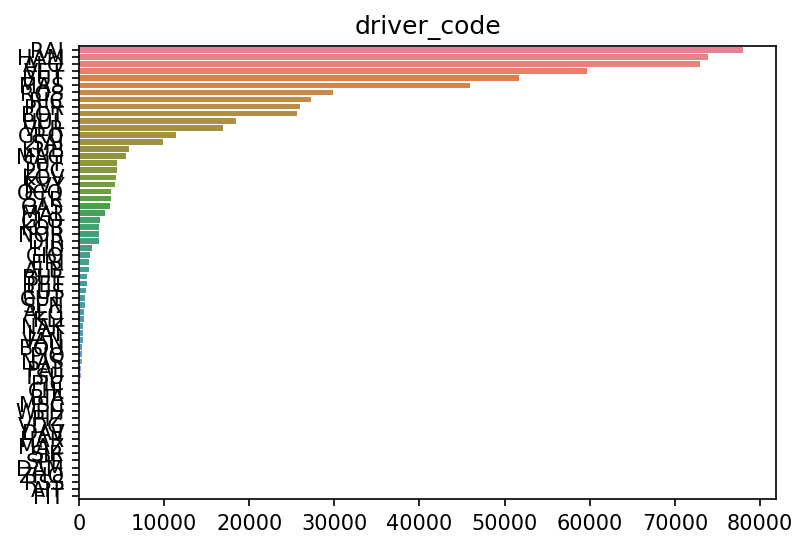

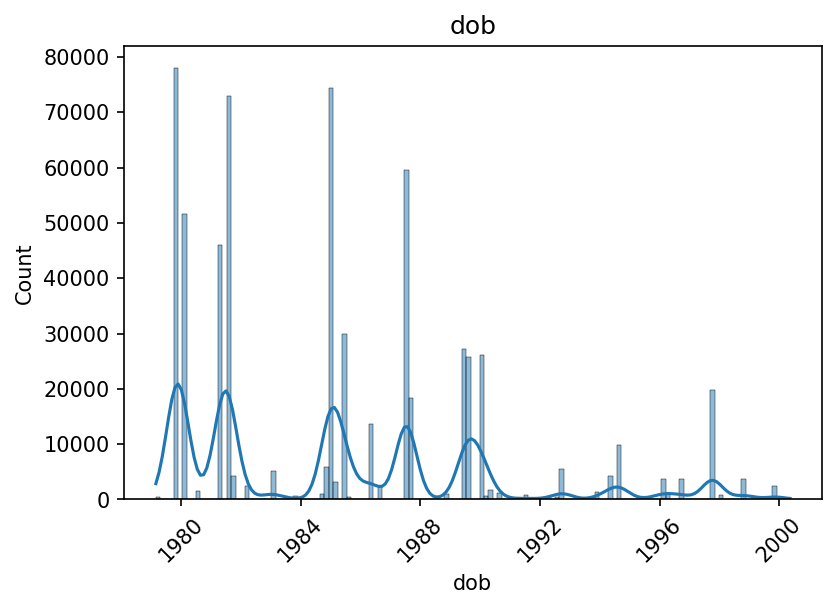

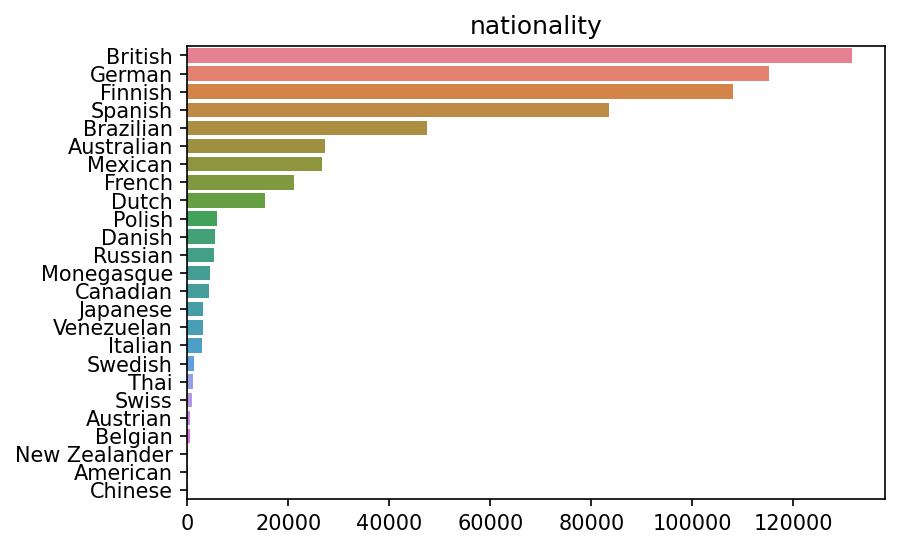

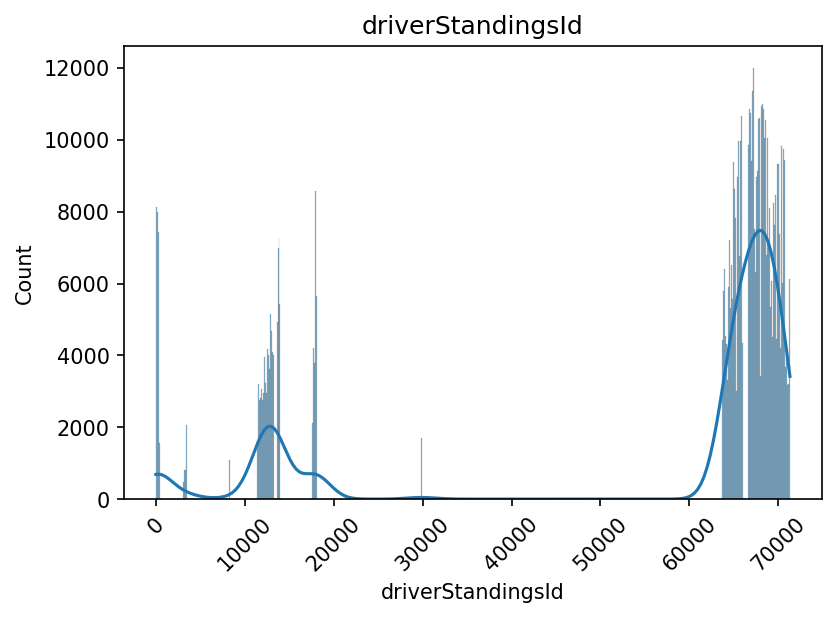

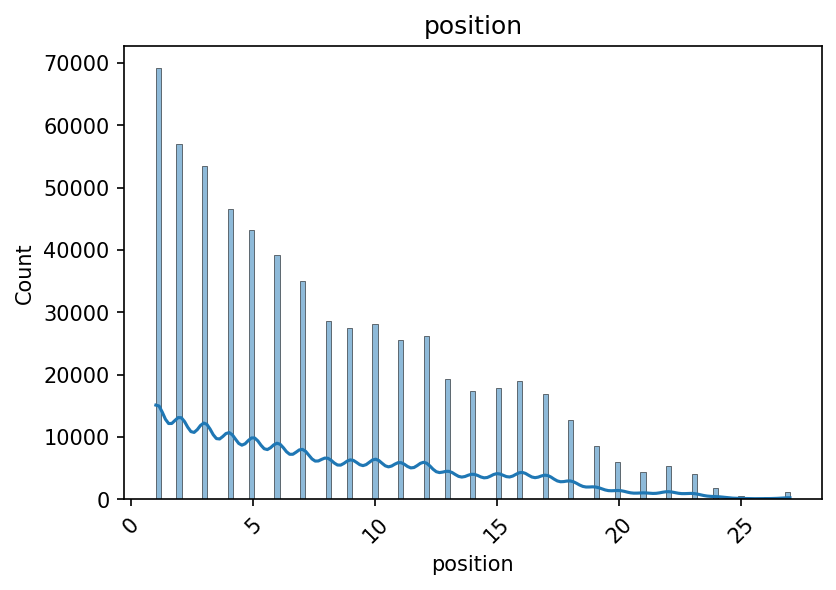

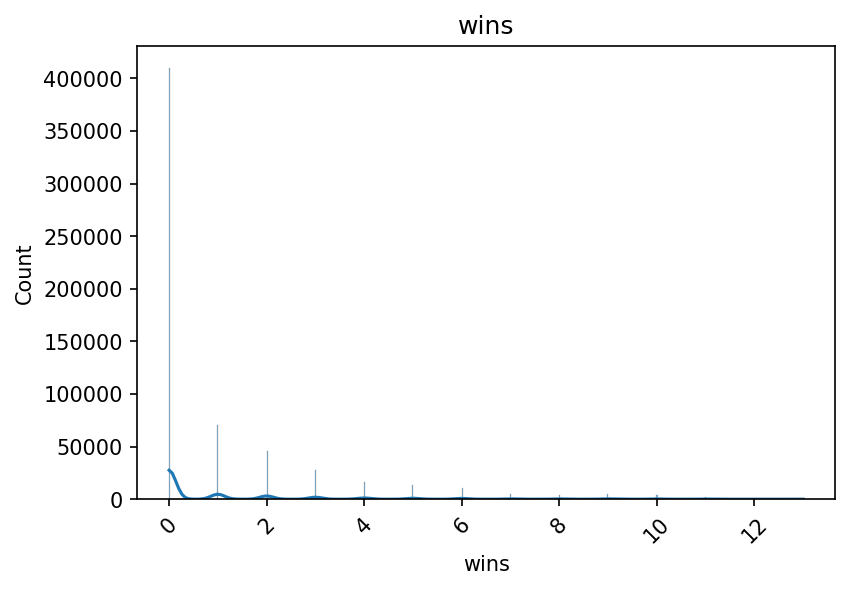

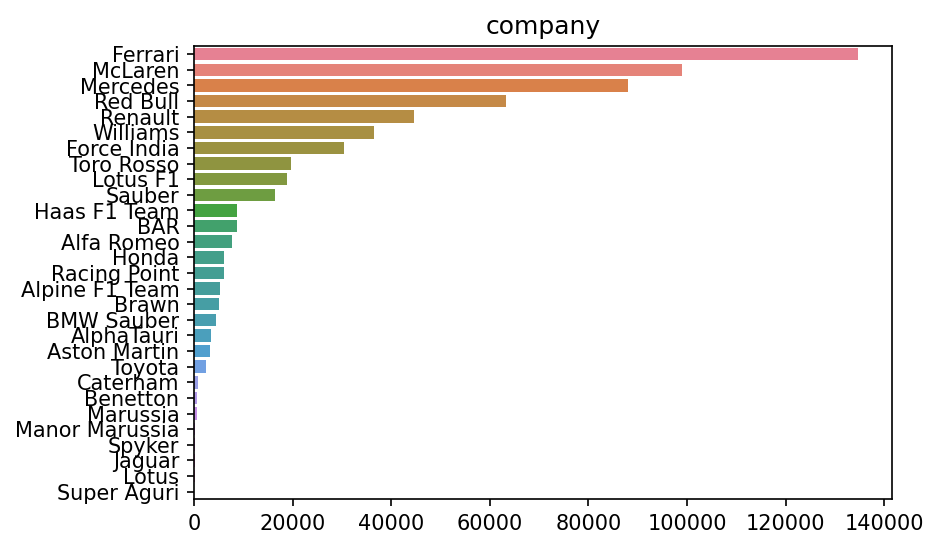

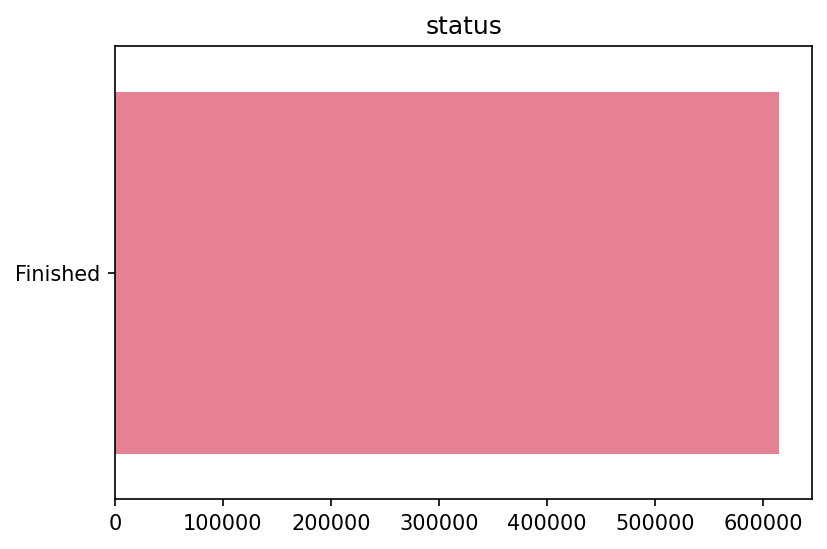

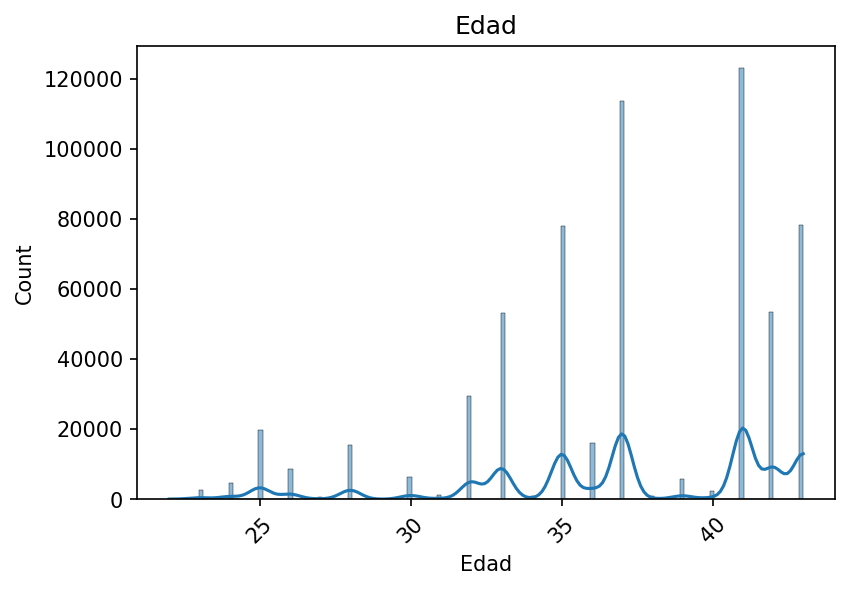

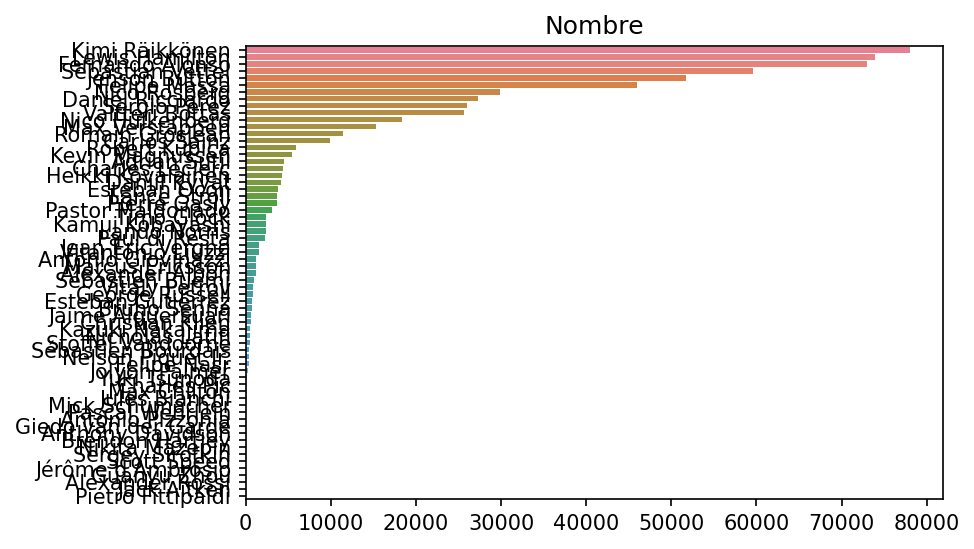

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,...,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,Edad,Nombre
0,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,1,1,1,McLaren,Finished,37.0,Lewis Hamilton
1,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,9,1,1,McLaren,Finished,37.0,Lewis Hamilton
2,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,27,3,1,McLaren,Finished,37.0,Lewis Hamilton
3,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,48,2,1,McLaren,Finished,37.0,Lewis Hamilton
4,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,69,3,1,McLaren,Finished,37.0,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250113,23346,967,839,209,31,22,12,0.0,71,10907144.0,...,OCO,1996-09-17,French,70731,11,1,Manor Marussia,Finished,26.0,Esteban Ocon
1250114,23346,967,839,209,31,22,12,0.0,71,10907144.0,...,OCO,1996-09-17,French,70752,11,1,Manor Marussia,Finished,26.0,Esteban Ocon
1250115,23346,967,839,209,31,22,12,0.0,71,10907144.0,...,OCO,1996-09-17,French,71258,7,0,Manor Marussia,Finished,26.0,Esteban Ocon
1250116,23346,967,839,209,31,22,12,0.0,71,10907144.0,...,OCO,1996-09-17,French,71278,6,0,Manor Marussia,Finished,26.0,Esteban Ocon


In [101]:
graf_automaticos(df)

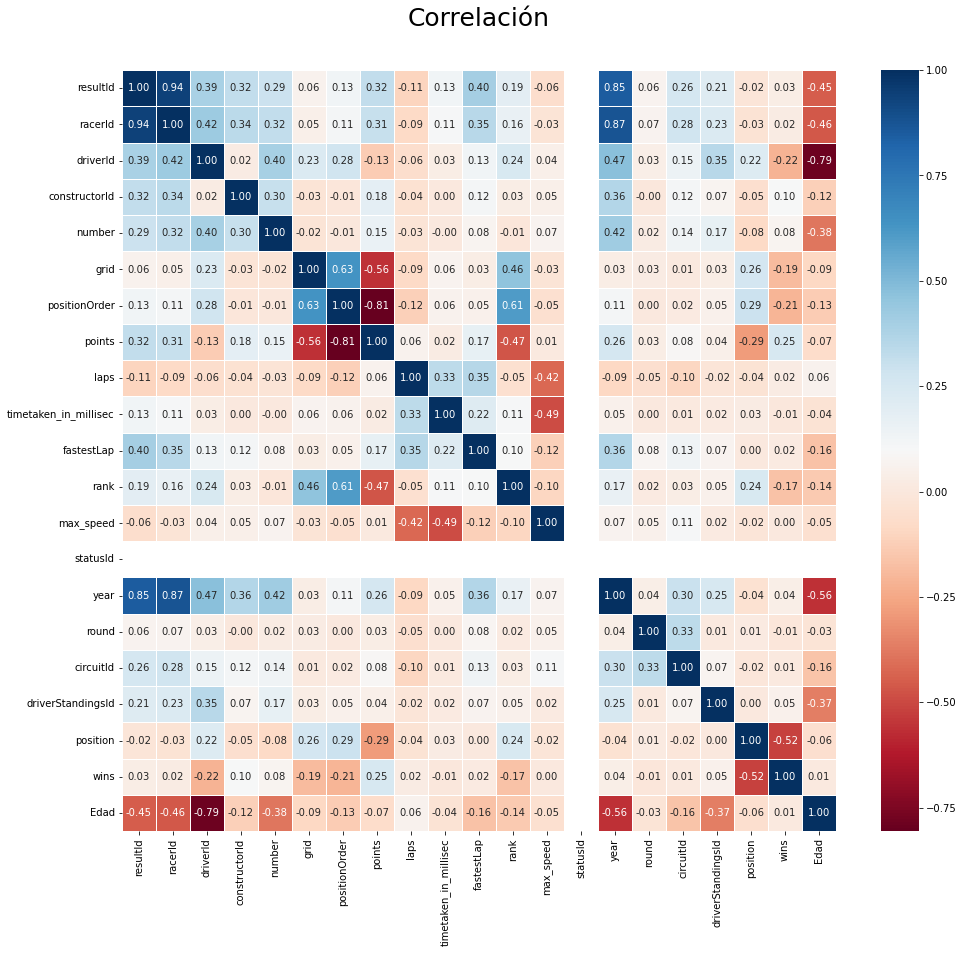

In [102]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Correlación', y=1.05, size=25,)
sns.heatmap(df.corr(),linewidths=0.5,
             cmap=colormap, linecolor='white', annot=True,fmt='.2f')

Se puede observar que existen muy bajas correlaciones entre la data aunque llama la atención los siguientes pares:
- Edad wins con un 0.01
- wins constructorID con un 0.1
- number y wins
- year fastestlap con un 0.36
- year maxspeed con un 0.07
- rank position order con un 0.61
- fastestlap con laps con un 0.35
- position order con driverID con un 0.28
- position order con rank con un 0.63

In [103]:
df.loc[df['driver_code']=='HAM',:]

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,...,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,Edad,Nombre
0,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,1,1,1,McLaren,Finished,37.0,Lewis Hamilton
1,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,9,1,1,McLaren,Finished,37.0,Lewis Hamilton
2,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,27,3,1,McLaren,Finished,37.0,Lewis Hamilton
3,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,48,2,1,McLaren,Finished,37.0,Lewis Hamilton
4,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,69,3,1,McLaren,Finished,37.0,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234711,25449,1076,1,131,44,5,4,12.0,58,5295091.0,...,HAM,1985-01-07,British,70719,2,8,Mercedes,Finished,37.0,Lewis Hamilton
234712,25449,1076,1,131,44,5,4,12.0,58,5295091.0,...,HAM,1985-01-07,British,70740,2,8,Mercedes,Finished,37.0,Lewis Hamilton
234713,25449,1076,1,131,44,5,4,12.0,58,5295091.0,...,HAM,1985-01-07,British,71254,3,0,Mercedes,Finished,37.0,Lewis Hamilton
234714,25449,1076,1,131,44,5,4,12.0,58,5295091.0,...,HAM,1985-01-07,British,71274,5,0,Mercedes,Finished,37.0,Lewis Hamilton


In [105]:
df.year.unique()

array([2008, 2007, 2009, 2010, 2011, 2012, 2015, 2016, 2017, 2018, 2006,
       2005, 2004, 2003, 2002, 2013, 2014, 2021, 2022, 2019, 2020, 2000,
       2001])

Se filtrara con la llegada de red bull a la formula 1 que es el año 2005

In [106]:
df=df.loc[df['year']>2005,:]

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,...,driver_code,dob,nationality,driverStandingsId,position,wins,company,status,Edad,Nombre
0,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,1,1,1,McLaren,Finished,37.0,Lewis Hamilton
1,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,9,1,1,McLaren,Finished,37.0,Lewis Hamilton
2,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,27,3,1,McLaren,Finished,37.0,Lewis Hamilton
3,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,48,2,1,McLaren,Finished,37.0,Lewis Hamilton
4,1,18,1,1,22,1,1,10.0,58,5690616.0,...,HAM,1985-01-07,British,69,3,1,McLaren,Finished,37.0,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250113,23346,967,839,209,31,22,12,0.0,71,10907144.0,...,OCO,1996-09-17,French,70731,11,1,Manor Marussia,Finished,26.0,Esteban Ocon
1250114,23346,967,839,209,31,22,12,0.0,71,10907144.0,...,OCO,1996-09-17,French,70752,11,1,Manor Marussia,Finished,26.0,Esteban Ocon
1250115,23346,967,839,209,31,22,12,0.0,71,10907144.0,...,OCO,1996-09-17,French,71258,7,0,Manor Marussia,Finished,26.0,Esteban Ocon
1250116,23346,967,839,209,31,22,12,0.0,71,10907144.0,...,OCO,1996-09-17,French,71278,6,0,Manor Marussia,Finished,26.0,Esteban Ocon


# algunos gráficos